## Deep Learning for Mortality Prediction (DLMP)

### Import packages 

In [1]:
import tensorflow as tf
import csv
import numpy as np
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
tfkl = tf.keras.layers

### Import functions

In [2]:
import dl_functions
import lc_functions
import figure_functions
import evaluation_functions
import importlib

importlib.reload(figure_functions)
importlib.reload(lc_functions)
importlib.reload(dl_functions)
importlib.reload(evaluation_functions)

<module 'evaluation_functions' from '/Users/paigepark/Desktop/deep-mort/code/evaluation_functions.py'>

### Import data

#### State data

In [3]:
state_training = np.loadtxt('../data/state_training.txt')
state_test = np.loadtxt('../data/state_test.txt')
state_final_test = np.loadtxt('../data/state_final_test.txt')

#### Country data

In [4]:
country_training = np.loadtxt('../data/country_training.txt')
country_test = np.loadtxt('../data/country_test.txt')
country_final_test = np.loadtxt('../data/country_final_test.txt')

#### Combined data

In [5]:
combined_training = np.loadtxt('../data/combined_training.txt')
combined_test = np.loadtxt('../data/combined_test.txt')
combined_final_test = np.loadtxt('../data/combined_final_test.txt')

In [6]:
geos_key = np.load('../data/geos_key.npy')

### Train Seperate DL Models for Country and State Data

#### State Model

In [154]:
# convert data to tensors and other prep 
state_train_prepped = dl_functions.prep_data(state_training, mode="train")
state_test_prepped = dl_functions.prep_data(state_test, mode="test")
state_final_test_prepped = dl_functions.prep_data(state_final_test, mode="test")

In [155]:
# get the proper geography input dimension for model set up 
unique_vals = tf.unique(state_training[:, 0]).y
state_geo_dim = np.array(tf.size(unique_vals)).item()
state_geo_dim

50

In [156]:
# run model for states
model_state, loss_info_state = dl_functions.run_deep_model(state_train_prepped, state_test_prepped, state_geo_dim, 30)

Epoch 1/30
1000/1000 - 8s - 8ms/step - loss: 0.0137 - val_loss: 3.2647e-04 - learning_rate: 0.0010
Epoch 2/30
1000/1000 - 6s - 6ms/step - loss: 7.0723e-04 - val_loss: 1.8026e-04 - learning_rate: 0.0010
Epoch 3/30
1000/1000 - 6s - 6ms/step - loss: 3.5457e-04 - val_loss: 3.5434e-04 - learning_rate: 0.0010
Epoch 4/30
1000/1000 - 6s - 6ms/step - loss: 2.5796e-04 - val_loss: 4.8416e-04 - learning_rate: 0.0010
Epoch 5/30
1000/1000 - 6s - 6ms/step - loss: 2.0004e-04 - val_loss: 1.3848e-04 - learning_rate: 0.0010
Epoch 6/30
1000/1000 - 6s - 6ms/step - loss: 1.5730e-04 - val_loss: 2.2119e-04 - learning_rate: 0.0010
Epoch 7/30
1000/1000 - 6s - 6ms/step - loss: 1.2890e-04 - val_loss: 5.7453e-05 - learning_rate: 0.0010
Epoch 8/30
1000/1000 - 6s - 6ms/step - loss: 1.1152e-04 - val_loss: 1.1247e-04 - learning_rate: 0.0010
Epoch 9/30
1000/1000 - 6s - 6ms/step - loss: 9.7185e-05 - val_loss: 3.8160e-05 - learning_rate: 0.0010
Epoch 10/30
1000/1000 - 6s - 6ms/step - loss: 1.0180e-04 - val_loss: 5.6804e-

In [207]:
model_state.save('model_state.keras')

In [9]:
model_state = keras.models.load_model('model_state.keras')

#### Testing 1 pop model performance

In [111]:
print(combined_training)

[[0.00000e+00 0.00000e+00 1.95900e+03 0.00000e+00 3.00500e-02]
 [0.00000e+00 0.00000e+00 1.95900e+03 1.00000e+00 1.75000e-03]
 [0.00000e+00 0.00000e+00 1.95900e+03 2.00000e+00 9.00000e-04]
 ...
 [8.70000e+01 1.00000e+00 2.00500e+03 9.80000e+01 4.10780e-01]
 [8.70000e+01 0.00000e+00 2.00500e+03 9.90000e+01 3.75465e-01]
 [8.70000e+01 1.00000e+00 2.00500e+03 9.90000e+01 4.38072e-01]]


In [112]:
print(geos_key)

[['AK' '0']
 ['AL' '1']
 ['AZ' '2']
 ['AR' '3']
 ['CA' '4']
 ['CO' '5']
 ['CT' '6']
 ['DE' '7']
 ['FL' '8']
 ['GA' '9']
 ['HI' '10']
 ['ID' '11']
 ['IL' '12']
 ['IN' '13']
 ['IA' '14']
 ['KS' '15']
 ['KY' '16']
 ['LA' '17']
 ['ME' '18']
 ['MD' '19']
 ['MA' '20']
 ['MI' '21']
 ['MN' '22']
 ['MS' '23']
 ['MO' '24']
 ['MT' '25']
 ['NE' '26']
 ['NV' '27']
 ['NH' '28']
 ['NJ' '29']
 ['NM' '30']
 ['NY' '31']
 ['NC' '32']
 ['ND' '33']
 ['OH' '34']
 ['OK' '35']
 ['OR' '36']
 ['PA' '37']
 ['RI' '38']
 ['SC' '39']
 ['SD' '40']
 ['TN' '41']
 ['TX' '42']
 ['UT' '43']
 ['VT' '44']
 ['VA' '45']
 ['WA' '46']
 ['WV' '47']
 ['WI' '48']
 ['WY' '49']
 ['AUS' '50']
 ['AUT' '51']
 ['BEL' '52']
 ['BGR' '53']
 ['BLR' '54']
 ['CAN' '55']
 ['CHE' '56']
 ['CZE' '57']
 ['DNK' '58']
 ['ESP' '59']
 ['EST' '60']
 ['FIN' '61']
 ['FRATNP' '62']
 ['GBRTENW' '63']
 ['GBR_NIR' '64']
 ['GBR_SCO' '65']
 ['GRC' '66']
 ['HUN' '67']
 ['IRL' '68']
 ['ISL' '69']
 ['ISR' '70']
 ['ITA' '71']
 ['JPN' '72']
 ['LTU' '73']
 ['LUX' '

In [37]:
us_only_training = combined_training[combined_training[:,0] == 87]
us_only_test = combined_test[combined_test[:,0] == 87]

In [114]:
print(us_only_training)

[[8.70000e+01 0.00000e+00 1.95900e+03 0.00000e+00 2.37060e-02]
 [8.70000e+01 1.00000e+00 1.95900e+03 0.00000e+00 3.08840e-02]
 [8.70000e+01 0.00000e+00 1.95900e+03 1.00000e+00 1.61300e-03]
 ...
 [8.70000e+01 1.00000e+00 2.00500e+03 9.80000e+01 4.10780e-01]
 [8.70000e+01 0.00000e+00 2.00500e+03 9.90000e+01 3.75465e-01]
 [8.70000e+01 1.00000e+00 2.00500e+03 9.90000e+01 4.38072e-01]]


In [115]:
us_only_training.shape

(9400, 5)

In [38]:
us_training_prepped = dl_functions.prep_data(us_only_training, mode="train")
us_test_prepped = dl_functions.prep_data(us_only_test, mode="test")

In [39]:
us_geo_dim = 88

In [119]:
model_us, loss_us = dl_functions.run_deep_model(us_training_prepped, us_test_prepped, us_geo_dim, 30)

Epoch 1/30
1000/1000 - 9s - 9ms/step - loss: 0.0140 - val_loss: 3.7890e-04 - learning_rate: 0.0010
Epoch 2/30
1000/1000 - 8s - 8ms/step - loss: 9.6913e-04 - val_loss: 4.0420e-04 - learning_rate: 0.0010
Epoch 3/30
1000/1000 - 8s - 8ms/step - loss: 5.0607e-04 - val_loss: 3.3589e-04 - learning_rate: 0.0010
Epoch 4/30
1000/1000 - 7s - 7ms/step - loss: 2.8906e-04 - val_loss: 2.3048e-04 - learning_rate: 0.0010
Epoch 5/30
1000/1000 - 6s - 6ms/step - loss: 2.0655e-04 - val_loss: 2.4863e-04 - learning_rate: 0.0010
Epoch 6/30
1000/1000 - 6s - 6ms/step - loss: 1.4190e-04 - val_loss: 1.5838e-04 - learning_rate: 0.0010
Epoch 7/30
1000/1000 - 6s - 6ms/step - loss: 1.0036e-04 - val_loss: 3.0165e-04 - learning_rate: 0.0010
Epoch 8/30
1000/1000 - 6s - 6ms/step - loss: 7.5181e-05 - val_loss: 7.3206e-05 - learning_rate: 0.0010
Epoch 9/30
1000/1000 - 6s - 6ms/step - loss: 6.2665e-05 - val_loss: 1.1902e-04 - learning_rate: 0.0010
Epoch 10/30
1000/1000 - 6s - 6ms/step - loss: 4.9247e-05 - val_loss: 1.4722e-

In [120]:
model_us.save('us_only.keras')

In [7]:
model_state_ga = keras.models.load_model('model_state_ga.keras')

#### Country Model

In [124]:
# prep data
country_train_prepped = dl_functions.prep_data(country_training, mode="train")
country_test_prepped = dl_functions.prep_data(country_test, mode="test")
country_final_test_prepped = dl_functions.prep_data(country_final_test, mode="test")

In [125]:
# get the proper geography input dimension for model set up 
unique_vals = tf.unique(country_training[:, 0]).y
country_geo_dim = np.array(tf.size(unique_vals)).item()
country_geo_dim = country_geo_dim + 50
country_geo_dim

88

In [126]:
# run country model
model_country, loss_info_country = dl_functions.run_deep_model(country_train_prepped, country_test_prepped, country_geo_dim, 30)

Epoch 1/30
1000/1000 - 7s - 7ms/step - loss: 0.0148 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 2/30
1000/1000 - 6s - 6ms/step - loss: 0.0019 - val_loss: 5.4493e-04 - learning_rate: 0.0010
Epoch 3/30
1000/1000 - 6s - 6ms/step - loss: 0.0013 - val_loss: 2.8860e-04 - learning_rate: 0.0010
Epoch 4/30
1000/1000 - 6s - 6ms/step - loss: 9.3948e-04 - val_loss: 5.2222e-04 - learning_rate: 0.0010
Epoch 5/30
1000/1000 - 6s - 6ms/step - loss: 8.6158e-04 - val_loss: 5.2156e-04 - learning_rate: 0.0010
Epoch 6/30
1000/1000 - 6s - 6ms/step - loss: 7.6207e-04 - val_loss: 2.3538e-04 - learning_rate: 0.0010
Epoch 7/30
1000/1000 - 6s - 6ms/step - loss: 7.2742e-04 - val_loss: 4.1996e-04 - learning_rate: 0.0010
Epoch 8/30
1000/1000 - 6s - 6ms/step - loss: 7.3215e-04 - val_loss: 2.7643e-04 - learning_rate: 0.0010
Epoch 9/30
1000/1000 - 6s - 6ms/step - loss: 6.9900e-04 - val_loss: 3.5773e-04 - learning_rate: 0.0010
Epoch 10/30
1000/1000 - 6s - 6ms/step - loss: 6.4889e-04 - val_loss: 2.9839e-04 - learnin

In [127]:
model_country.save('model_country.keras')

### Train Combined DL Model

In [7]:
# convert combined data to tensors and other prep
combined_train_prepped = dl_functions.prep_data(combined_training, mode="train")
combined_test_prepped = dl_functions.prep_data(combined_test, mode="test")
combined_final_test_prepped = dl_functions.prep_data(combined_final_test, mode="test")

In [8]:
# get the proper geography input dimension for model set up 
unique_vals = tf.unique(combined_training[:, 0]).y
combined_geo_dim = np.array(tf.size(unique_vals)).item()
print(combined_geo_dim)

88


In [56]:
def create_model(geo_dim):
    # defining inputs 
    year = tfkl.Input(shape=(1,), dtype='float32', name='Year')
    age =  tfkl.Input(shape=(1,), dtype='int32', name='Age')
    geography = tfkl.Input(shape=(1,), dtype='int32', name='Geography')
    gender = tfkl.Input(shape=(1,), dtype='int32', name='Gender')

    # defining embedding layers 
    age_embed = tfkl.Embedding(input_dim=100, output_dim=5, name='Age_embed')(age)
    age_embed = tfkl.Flatten()(age_embed)

    gender_embed = tfkl.Embedding(input_dim=2, output_dim=5, name='Gender_embed')(gender)
    gender_embed = tfkl.Flatten()(gender_embed)

    geography_embed = tfkl.Embedding(input_dim=geo_dim, output_dim=5, name='Geography_embed')(geography)
    geography_embed = tfkl.Flatten()(geography_embed)

    # create feature vector that concatenates all inputs 
    x = tfkl.Concatenate()([year, age_embed, gender_embed, geography_embed])
    x1 = x

    # setting up middle layers 
    x = tfkl.Dense(128, activation='tanh')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Dropout(0.05)(x)

    x = tfkl.Dense(128, activation='tanh')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Dropout(0.05)(x)

    x = tfkl.Dense(128, activation='tanh')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Dropout(0.05)(x)

    x = tfkl.Dense(128, activation='tanh')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Dropout(0.05)(x)

    # setting up output layer 
    x = tfkl.Concatenate()([x1, x])
    x = tfkl.Dense(128, activation='tanh')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Dropout(0.05)(x)
    
    v = tfkl.Dense(1, name='value')(x)

    pred = tfkl.Dense(1, activation='sigmoid', name='final')(x)

    # creating the model 
    model = keras.Model(inputs=[year, age, geography, gender], outputs=[pred, v])

    # compiling the model
    model.compile(optimizer='adam')

    return model

In [13]:
class TransformerBlock(tfkl.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = tfkl.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [tfkl.Dense(ff_dim, activation="relu"), tfkl.Dense(embed_dim),]
        )
        self.layernorm1 = tfkl.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tfkl.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tfkl.Dropout(rate)
        self.dropout2 = tfkl.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [77]:
def create_model(geo_dim):
    # defining inputs 
    year = tfkl.Input(shape=(1,), dtype='float32', name='Year')
    age =  tfkl.Input(shape=(1,), dtype='int32', name='Age')
    geography = tfkl.Input(shape=(1,), dtype='int32', name='Geography')
    gender = tfkl.Input(shape=(1,), dtype='int32', name='Gender')

    # defining embedding layers 
    age_embed = tfkl.Embedding(input_dim=100, output_dim=128, name='Age_embed')(age)

    gender_embed = tfkl.Embedding(input_dim=2, output_dim=128, name='Gender_embed')(gender)

    geography_embed = tfkl.Embedding(input_dim=geo_dim, output_dim=128, name='Geography_embed')(geography)

    year_embed = tfkl.Dense(128, 'relu')(year)

    # create feature vector that concatenates all inputs 
    x = keras.ops.stack([age_embed, gender_embed, geography_embed, year_embed[:, None, :]], axis=1)

    # setting up middle layers 
    for i in range(5):
        x = TransformerBlock(16, 2, 64)(x)

    x = tfkl.Flatten()(x)
    pred = tfkl.Dense(1, keras.activations.exponential, name='final')(x)

    # creating the model 
    model = keras.Model(inputs=[year, age, geography, gender], outputs=[pred])

    # compiling the model
    model.compile(loss='mse', optimizer='adam')

    return model

In [78]:
def run_deep_model(dataset_train, dataset_test, geo_dim, epochs):
    
    model = create_model(geo_dim)

    callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.25, patience=3, verbose=0, mode="auto", 
                                                    min_delta=1e-8, cooldown=0, min_lr=0.0)]
    history = model.fit(dataset_train, validation_data=dataset_test, validation_steps=25, steps_per_epoch=1000, 
                        epochs=epochs, verbose=1, callbacks=callbacks)

    loss_info = {
        'train_mse': history.history['loss'][-1],
        'val_mse': history.history['val_loss'][-1]
    }

    tf.keras.backend.clear_session()

    return model, loss_info

In [79]:
model_combined, loss_info_combined = run_deep_model(combined_train_prepped, combined_test_prepped, combined_geo_dim, 30)

Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 297s 291ms/step - loss: 0.2952 - val_loss: 0.0098 - learning_rate: 0.0010
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 297s 297ms/step - loss: 0.0127 - val_loss: 0.0105 - learning_rate: 0.0010
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 294s 294ms/step - loss: 0.0125 - val_loss: 0.0100 - learning_rate: 0.0010
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 295s 295ms/step - loss: 0.0127 - val_loss: 0.0100 - learning_rate: 0.0010
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 295s 295ms/step - loss: 0.0129 - val_loss: 0.0103 - learning_rate: 2.5000e-04
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 296s 296ms/step - loss: 0.0128 - val_loss: 0.0104 - learning_rate: 2.5000e-04
Epoch 7/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 297s 297ms/step - loss: 0.0126 - val_loss: 0.0103 - learning_rate: 2.5000e-04
Epoch 8/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 298s 298ms/step - loss: 0.0129 - val_loss: 0.0097 - learning_rate: 6.2500e-05
Epoch 9/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 294s 294ms/ste

KeyboardInterrupt: 

In [58]:
model_combined.save('model_combined.keras')

In [8]:
model_combined = keras.models.load_model('model_combined.keras')

### MSE for states only from combined model

In [137]:
state_mse_combined = model_combined.evaluate(state_test_prepped)

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - loss: 4.3987e-05


### MSE for countries only from combined model

In [138]:
country_mse_combined = model_combined.evaluate(country_test_prepped)

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - loss: 2.8212e-04


### Train Lee-Carter model

In [43]:
lc_output, lc_predictions, lc_val_mse = lc_functions.run_lc_model(train_data=combined_training, test_data=combined_test)

Skipping Geo: 74.0, Gender: 1.0 due to NaN or infinite values in m_x


In [205]:
np.savetxt("../data/lc_predictions.csv", lc_predictions, delimiter=",", fmt="%d")

### Generate Table 1: Training and Test MSEs
This table will document average MSEs (for states alone, countries alone, and total) over 5 training runs with each model (LC, deep learning seperate, deep learning joint)

In [ ]:
def compare_models(num_iterations):
    results = []
    for i in range(num_iterations):
        lc = lc_functions.run_lc_model(train_data=combined_training, test_data=combined_test)
        print(f"Lee Carter Iteration {i} Complete")

        state_model, state_only = dl_functions.run_deep_model(dataset_train=state_train_prepped, dataset_test=state_test_prepped, geo_dim=state_geo_dim, epochs=30)
        country_model, country_only = dl_functions.run_deep_model(dataset_train=country_train_prepped, dataset_test=country_test_prepped, geo_dim=country_geo_dim, epochs=30)

        ind_ave = ((state_only['val_mse']*50) + (country_only['val_mse']*37)) / 87
        seperate_dl = [state_only['val_mse'], country_only['val_mse'], ind_ave]
        print(f"Seperate DL Iteration {i} Complete")

        model_combined, loss_info_combined = dl_functions.run_deep_model(combined_train_prepped, combined_test_prepped, combined_geo_dim, epochs=30)

        state_combined = model_combined.evaluate(state_test_prepped)
        country_combined = model_combined.evaluate(country_test_prepped)
        total_combined = model_combined.evaluate(combined_test_prepped)

        combined_dl = [state_combined, country_combined, total_combined]
        print(f"Combined DL Iteration {i} Complete")

        results.append((lc, seperate_dl, combined_dl))

    return results
        

Comparison results are computationally costly to generate. Could be good to look into how Savio could help to speed this up. Commenting out for now.

In [27]:
# comparison_results = compare_models(num_iterations=1)

In [28]:
# lc_results = np.array([result[0][0] for result in comparison_results])
# seperate_dl_results = np.array([result[1] for result in comparison_results])
# combined_dl_results = np.array([result[2] for result in comparison_results])

In [29]:
# lc_avg = np.mean(lc_results, axis=0)
# seperate_dl_avg = np.mean(seperate_dl_results, axis=0)
# combined_dl_avg = np.mean(combined_dl_results, axis=0)

In [30]:
# average_results = np.array([lc_avg, seperate_dl_avg, combined_dl_avg])

# # Multiply each value by 10^4 for table clarity
# average_results = [[value * 10**4 for value in row] for row in average_results]
# average_results_rounded = np.round(average_results, 3).T
# print(average_results_rounded)

In [31]:
# from tabulate import tabulate

# column_labels = ["Lee Carter Model", "Separate DL Models", "Combined DL Model"]
# row_labels = ["State Test MSE", "Country Test MSE", "Weighted Average of MSEs"]

# table_data = [[row_labels[i]] + list(average_results_rounded[i]) for i in range(len(row_labels))]

# latex_table = tabulate(table_data, headers=["Test MSE by Model"] + column_labels, tablefmt="latex")


In [32]:
# print(latex_table)

#### Generate a few examples of fit by model 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━

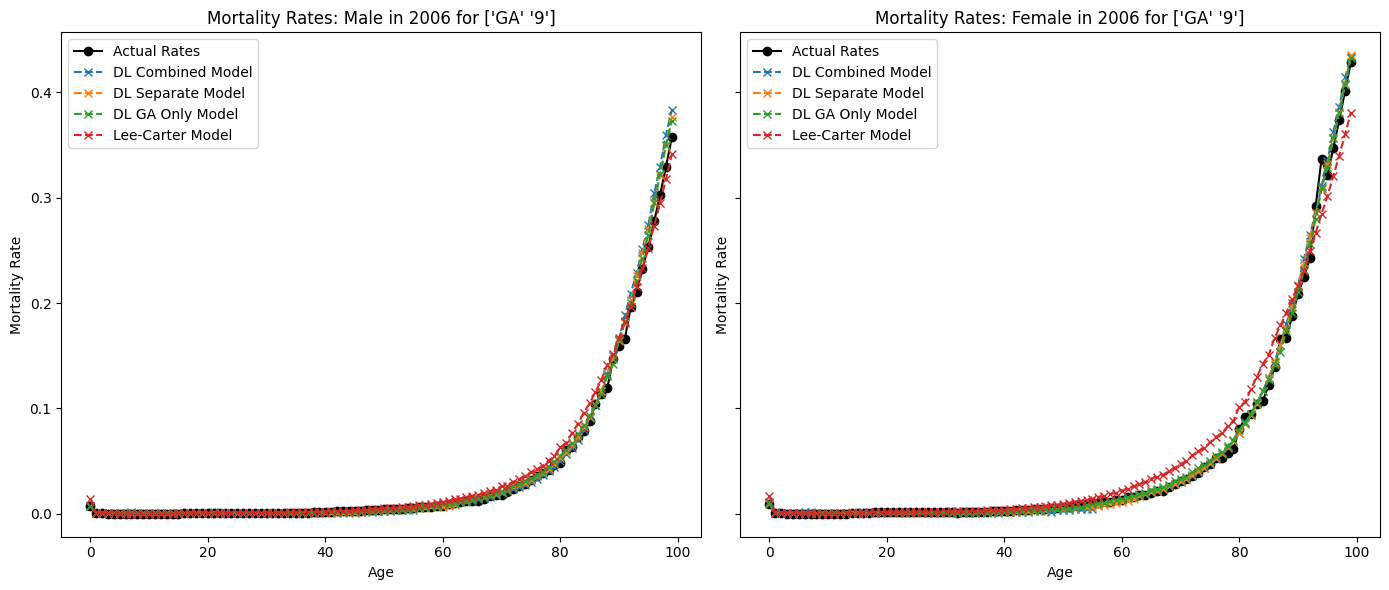

In [160]:
figure_functions.plot_mort_predictions(geo=9, year= 2006, age_range=np.arange(0,100), genders=[0,1], data=combined_test, 
                      dl_models={
                          'DL Combined': model_combined,
                          'DL Separate': model_state,
                          'DL GA Only': model_state_ga
                      }, model_names=['DL Combined','DL Separate', 'DL GA Only','Lee-Carter'], lc_predictions=lc_predictions, geos_key=geos_key)

#### Plot difference from actual rates by year and age 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

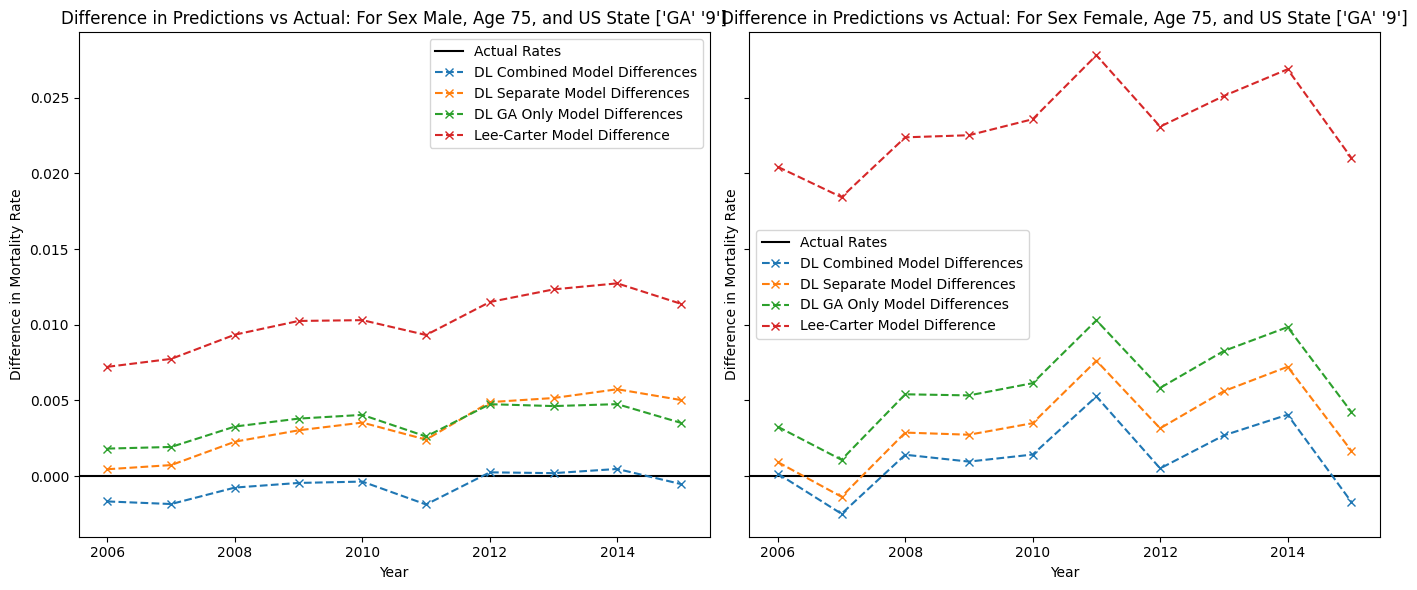

In [167]:
figure_functions.plot_pred_diff_by_year(geo=9, year_range=np.arange(2006, 2016), age=75, genders=[0,1], data=combined_test, 
                      dl_models={
                          'DL Combined': model_combined,
                          'DL Separate': model_state,
                          'DL GA Only': model_state_ga
                      }, model_names=['DL Combined','DL Separate', 'DL GA Only', 'Lee-Carter'], lc_predictions=lc_predictions, geos_key=geos_key)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━

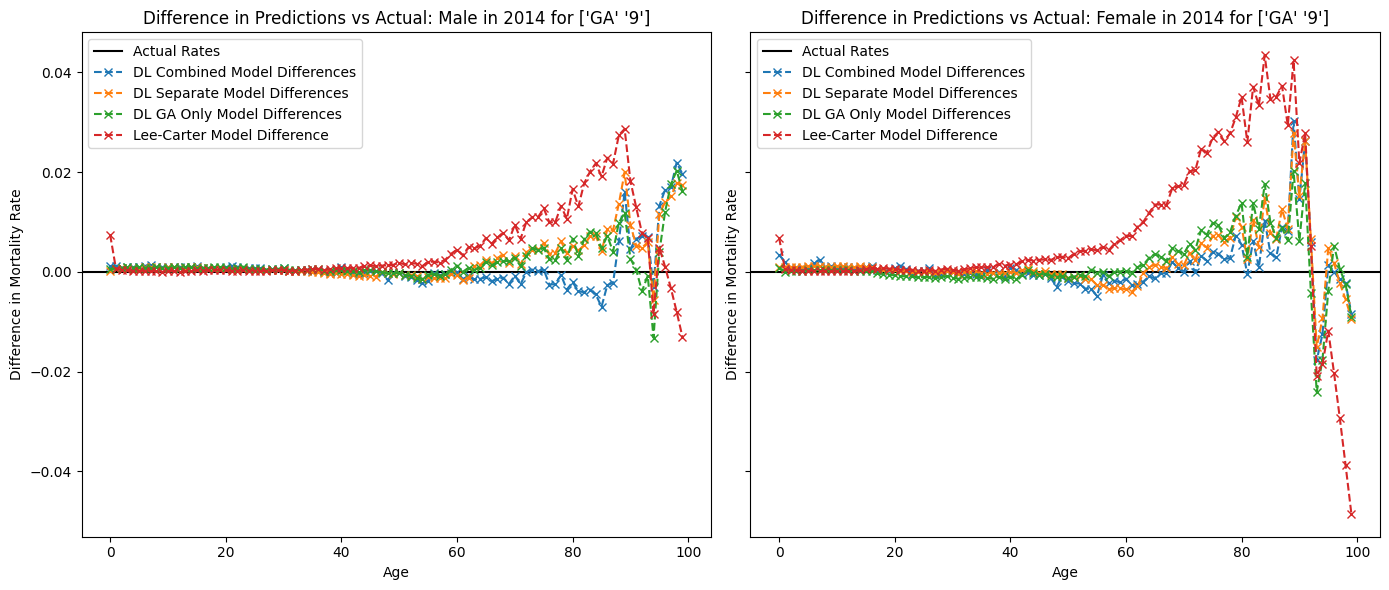

In [168]:
figure_functions.plot_pred_diff_by_age(geo=9, year= 2014, age_range=np.arange(0,100), genders=[0,1], data=combined_test, 
                      dl_models={
                          'DL Combined': model_combined,
                          'DL Separate': model_state,
                          'DL GA Only': model_state_ga
                      }, model_names=['DL Combined','DL Separate', 'DL GA Only', 'Lee-Carter'], lc_predictions=lc_predictions, geos_key=geos_key)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

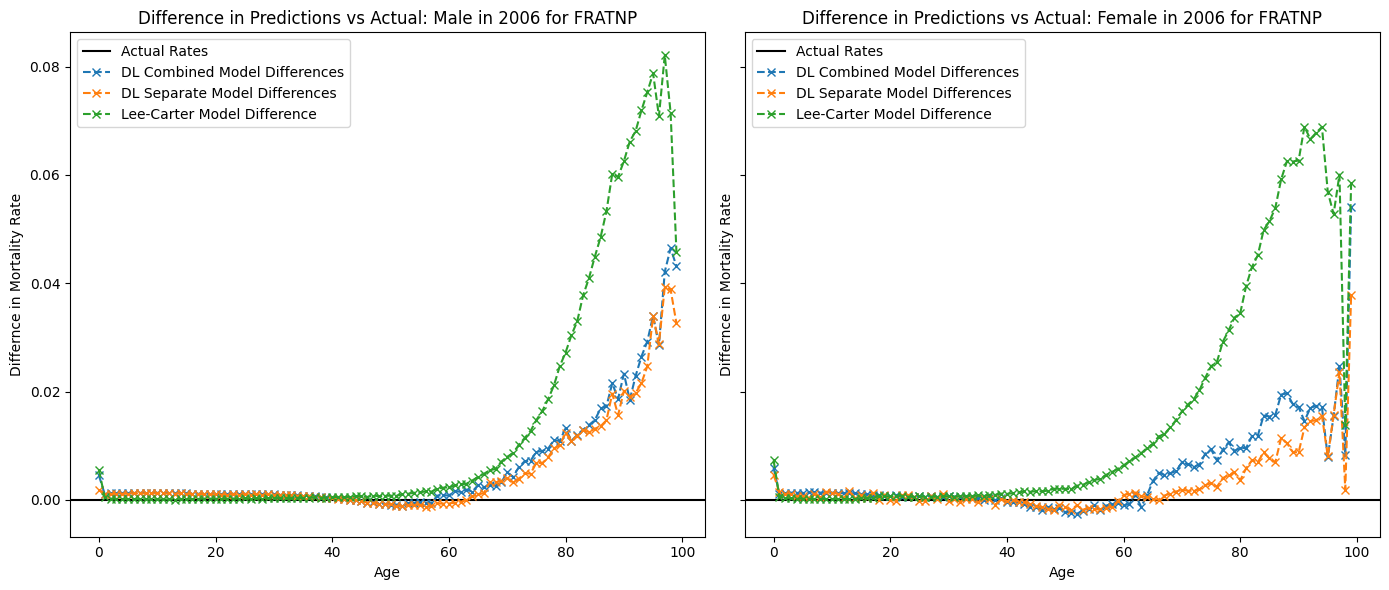

In [ ]:
figure_functions.plot_pred_diff_by_age(geo=62, year= 2006, age_range=np.arange(0,100), genders=[0,1], data=combined_test, 
                      dl_models={
                          'DL Combined': model_combined,
                          'DL Separate': model_country
                      }, model_names=['DL Combined','DL Separate', 'Lee-Carter'], lc_predictions=lc_predictions, geos_key=geos_list)

#### Generate Subgroup MSE Barplots

Generate predictions for whole validation set, then filter sample and do MSE calculation

In [ ]:
lc_mses = evaluation_functions.calculate_mse_by_category_lc(lc_predictions, combined_test, feature_index=0) # 0 is geo in test data

In [42]:
print(lc_mses)

{0: 0.000505086383750791, 1: 0.00016727167949998496, 2: 0.00013923665598574074, 3: 9.686659549858767e-05, 4: 0.0002810058493022958, 5: 0.00016452314690351076, 6: 0.00025939602799368155, 7: 0.00022764825446593807, 8: 0.00014576977033699595, 9: 0.00016182086562969986, 10: 0.00015821085136177046, 11: 0.00014853081812886832, 12: 0.0003156142631741746, 13: 0.00019302393083707746, 14: 0.0001729222263211934, 15: 0.00015014476009328172, 16: 0.0001155720095863507, 17: 0.00018536425581226634, 18: 0.00019493606582454047, 19: 0.0002927229395554671, 20: 0.00025740618632561657, 21: 0.00019003569755644505, 22: 0.0002077788732956386, 23: 0.00022414136525277805, 24: 0.0001838757631459525, 25: 0.00015646026855760937, 26: 0.00016012290863475103, 27: 0.00012077508287191175, 28: 0.0002790325426898022, 29: 0.0003072367419880135, 30: 0.00013000781525188314, 31: 0.0003658689690360428, 32: 0.00013219737033016144, 33: 0.00018677705220290737, 34: 0.0002134848647383149, 35: 9.58291074067974e-05, 36: 0.00015486434

In [ ]:
geo_mses_combined = evaluation_functions.calculate_mse_by_category(combined_test_prepped, model_combined, feature_index=2) # 2 is geo in combined_test_prepped

In [ ]:
geos_mses_separate_states = evaluation_functions.calculate_mse_by_category(state_test_prepped, model_state, feature_index=2) # 2 is geo in combined_test_prepped

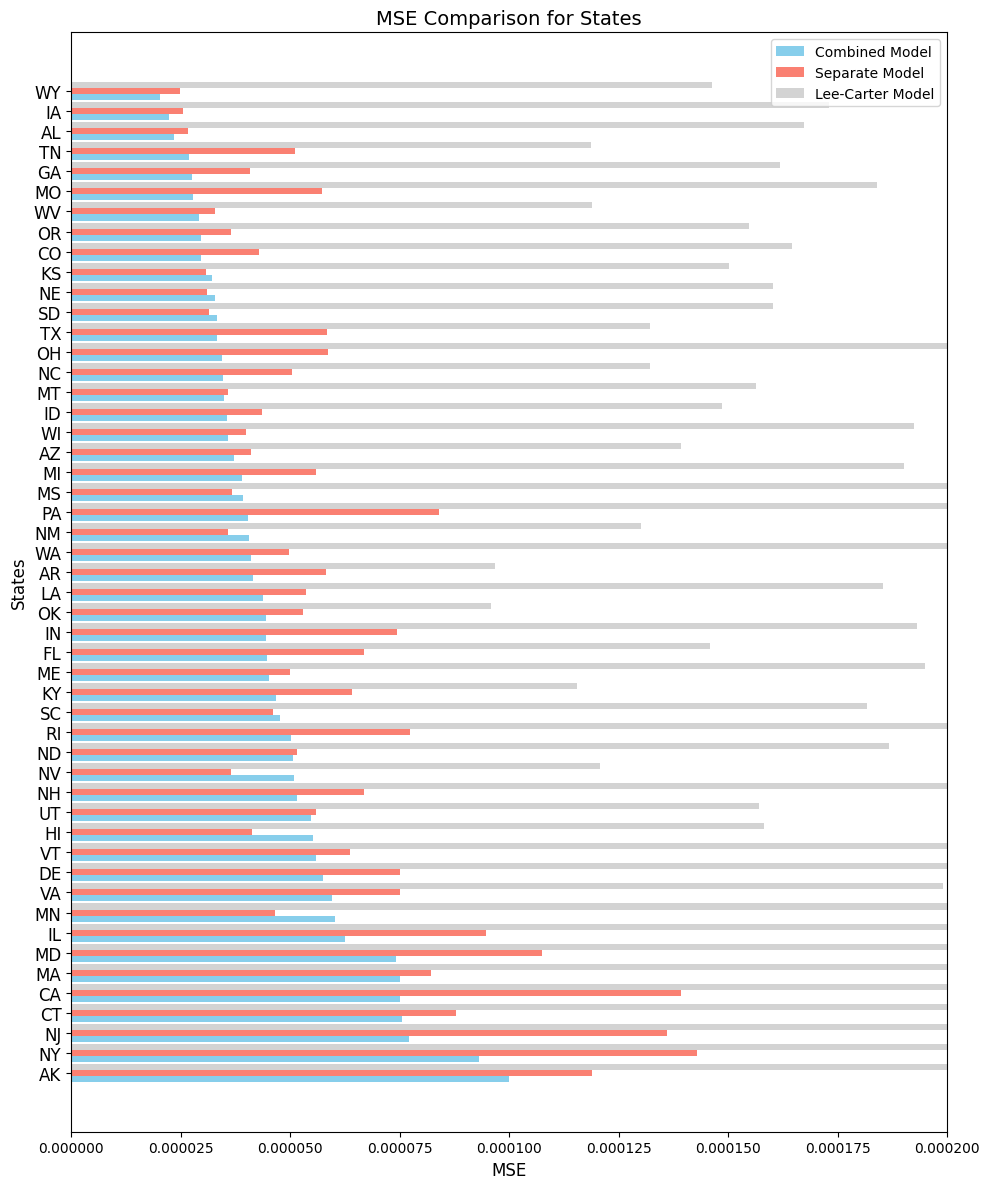

In [91]:
fig, ax = figure_functions.plot_mse_section(mse_by_category1=geo_mses_combined, mse_by_category2=geos_mses_separate_states, mse_by_category3=lc_mses, 
                                  category_labels=geos_key, plot_type="States", start=0, end=49, x_max=0.0002)

fig.savefig("mse_states.pdf", format="pdf")
plt.show()
plt.close()    

In [ ]:
geos_mses_separate_countries = evaluation_functions.calculate_mse_by_category(country_test_prepped, model_country, feature_index=2)

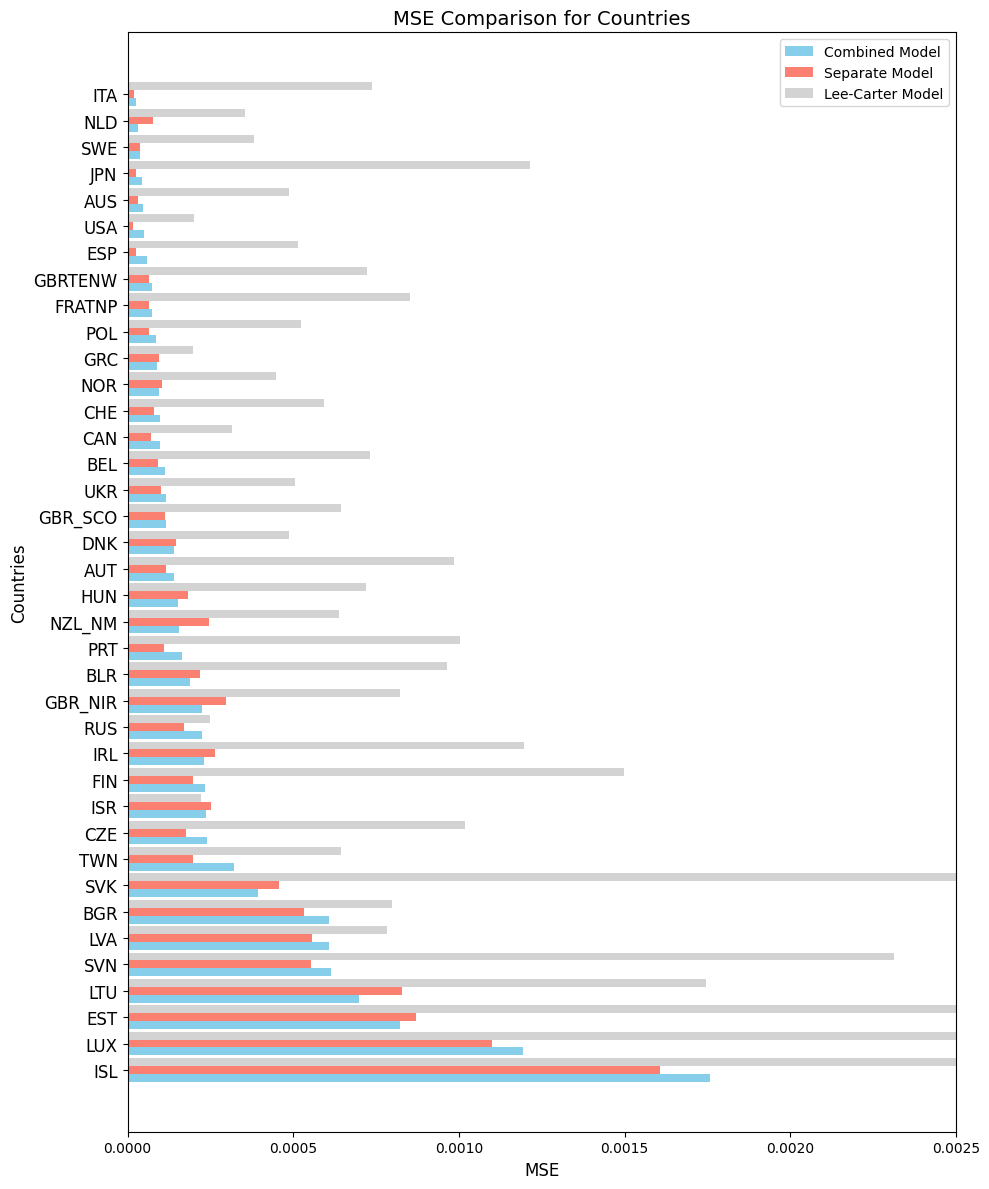

In [93]:
figure_functions.plot_mse_section(geo_mses_combined, geos_mses_separate_countries, lc_mses, geos_key, "Countries", start=50, end=87, x_max=0.0025)

plt.savefig("mse_countries.pdf", format="pdf")
plt.show()
plt.close()  

Save scores by country for each model

In [171]:
mses_by_country = pd.DataFrame({'Lee-Carter': lc_mses, 'Deep Learning': geo_mses_combined})
key = {int(num): label for label, num in geos_key}
mses_by_country.index = mses_by_country.index.map(key)
mses_by_country.to_csv('mses_by_country.csv', index=True)

NameError: name 'lc_mses' is not defined

Plot MSEs by age

In [106]:
import evaluation_functions

importlib.reload(evaluation_functions)

<module 'evaluation_functions' from '/Users/paigepark/Desktop/deep-mort/code/evaluation_functions.py'>

In [34]:
# lc_predictions = np.loadtxt("../data/lc_predictions.csv", delimiter=",")

In [44]:
lc_predictions_new = lc_predictions[lc_predictions[:,0] == 87]
combined_test_new = combined_test[combined_test[:,0] == 87] 

In [55]:
lc_mse, lc_rmse, lc_rrmse = evaluation_functions.calculate_error_by_category_lc(lc_predictions_new, combined_test_new, feature_index=3) # 3 is age in test_data
# ga_dl_mse, ga_dl_rmse, ga_dl_rrmse = evaluation_functions.calculate_error_by_category(us_test_prepped, model_us, feature_index=1) # 1 is age in combined_test_prepped
# state_mse, state_rmse, state_rrmse = evaluation_functions.calculate_error_by_category(us_test_prepped, model_country, feature_index=1) # 1 is age in combined_test_prepped
com_mse, com_rmse, com_rrmse = evaluation_functions.calculate_error_by_category(us_test_prepped, model_combined, feature_index=1) # 1 is age in combined_test_prepped

2025-01-25 12:49:53.206058: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


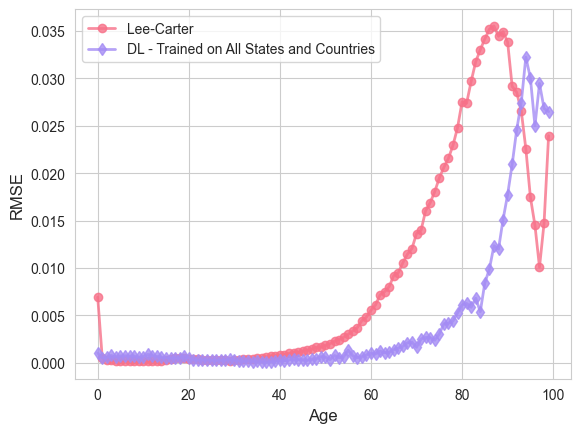

In [56]:
# Set a seaborn style for aesthetics
sns.set_style("whitegrid")

# Use a color palette
palette = sns.color_palette("husl", 4)

# Sort dictionaries by keys (in case keys are not in order)
keys1, values1 = zip(*sorted(lc_rmse.items()))
# keys2, values2 = zip(*sorted(ga_dl_rmse.items()))
# keys3, values3 = zip(*sorted(state_rmse.items()))
keys4, values4 = zip(*sorted(com_rmse.items()))

# Plot the data
plt.plot(keys1, values1, label="Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
# plt.plot(keys2, values2, label="DL - Trained on us Only", color=palette[1], linestyle='-', marker='s', linewidth=2, alpha=0.8)
# plt.plot(keys3, values3, label="DL - Trained on All countries", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
plt.plot(keys4, values4, label="DL - Trained on All States and Countries", color=palette[3], linestyle='-', marker='d', linewidth=2, alpha=0.8)

# Add labels, legend, and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
# plt.title("Relative RMSEs for Lee-Carter and Deep Learning Models by Age: Georgia")
plt.legend(fontsize=10, loc='best')

plt.savefig("../results/MN_rsme_over_age.pdf", format="pdf")

# Show the plot
plt.show()

RRMSE

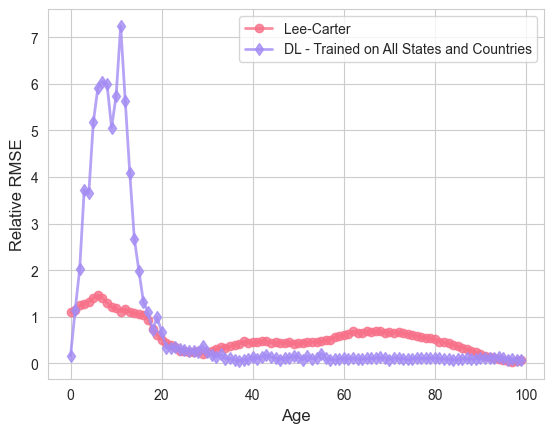

In [57]:
# Set a seaborn style for aesthetics
sns.set_style("whitegrid")

# Use a color palette
palette = sns.color_palette("husl", 4)

# Sort dictionaries by keys (in case keys are not in order)
keys1, values1 = zip(*sorted(lc_rrmse.items()))
# keys2, values2 = zip(*sorted(ga_dl_rrmse.items()))
# keys3, values3 = zip(*sorted(state_rrmse.items()))
keys4, values4 = zip(*sorted(com_rrmse.items()))

# Plot the data
plt.plot(keys1, values1, label="Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
# plt.plot(keys2, values2, label="DL - Trained on Minnesota Only", color=palette[1], linestyle='-', marker='s', linewidth=2, alpha=0.8)
# plt.plot(keys3, values3, label="DL - Trained on All US States", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
plt.plot(keys4, values4, label="DL - Trained on All States and Countries", color=palette[3], linestyle='-', marker='d', linewidth=2, alpha=0.8)

# Add labels, legend, and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Relative RMSE", fontsize=12)
# plt.title("Relative RMSEs for Lee-Carter and Deep Learning Models by Age: Georgia")
plt.legend(fontsize=10, loc='best')

plt.savefig("../results/MN_rrsme_over_age.pdf", format="pdf")

# Show the plot
plt.show()

RRMSE by year

In [84]:
import evaluation_functions

importlib.reload(evaluation_functions)

<module 'evaluation_functions' from '/Users/paigepark/Desktop/deep-mort/code/evaluation_functions.py'>

In [85]:
# lc_mse, lc_rmse, lc_rrmse = evaluation_functions.calculate_error_by_category_lc(lc_predictions_new, combined_test_new, feature_index=2) # 2 is year in test_data
ga_dl_mse, ga_dl_rmse, ga_dl_rrmse = evaluation_functions.calculate_error_by_category(state_test_prepped_new, model_state_new, feature_index=0) # 0 is year for tensors
state_mse, state_rmse, state_rrmse = evaluation_functions.calculate_error_by_category(state_test_prepped_new, model_state, feature_index=0) 
com_mse, com_rmse, com_rrmse = evaluation_functions.calculate_error_by_category(state_test_prepped_new, model_combined, feature_index=0)

[2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.]
[2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.]
[2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.]


In [99]:
geos_key

array([['AK', '0'],
       ['AL', '1'],
       ['AZ', '2'],
       ['AR', '3'],
       ['CA', '4'],
       ['CO', '5'],
       ['CT', '6'],
       ['DE', '7'],
       ['FL', '8'],
       ['GA', '9'],
       ['HI', '10'],
       ['ID', '11'],
       ['IL', '12'],
       ['IN', '13'],
       ['IA', '14'],
       ['KS', '15'],
       ['KY', '16'],
       ['LA', '17'],
       ['ME', '18'],
       ['MD', '19'],
       ['MA', '20'],
       ['MI', '21'],
       ['MN', '22'],
       ['MS', '23'],
       ['MO', '24'],
       ['MT', '25'],
       ['NE', '26'],
       ['NV', '27'],
       ['NH', '28'],
       ['NJ', '29'],
       ['NM', '30'],
       ['NY', '31'],
       ['NC', '32'],
       ['ND', '33'],
       ['OH', '34'],
       ['OK', '35'],
       ['OR', '36'],
       ['PA', '37'],
       ['RI', '38'],
       ['SC', '39'],
       ['SD', '40'],
       ['TN', '41'],
       ['TX', '42'],
       ['UT', '43'],
       ['VT', '44'],
       ['VA', '45'],
       ['WA', '46'],
       ['WV', '47'],
  

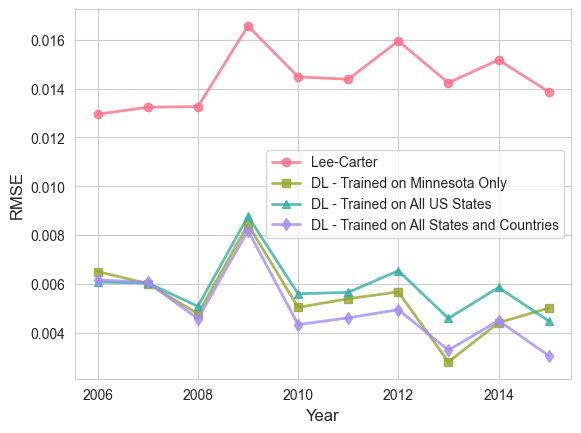

In [ ]:
# Set a seaborn style for aesthetics
sns.set_style("whitegrid")

# Use a color palette
palette = sns.color_palette("husl", 4)

# Sort dictionaries by keys (in case keys are not in order)
keys1, values1 = zip(*sorted(lc_rmse.items()))
keys2, values2 = zip(*sorted(ga_dl_rmse.items()))
keys3, values3 = zip(*sorted(state_rmse.items()))
keys4, values4 = zip(*sorted(com_rmse.items()))

# Plot the data
plt.plot(keys1, values1, label="Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
plt.plot(keys2, values2, label="DL - Trained on Minnesota Only", color=palette[1], linestyle='-', marker='s', linewidth=2, alpha=0.8)
plt.plot(keys3, values3, label="DL - Trained on All US States", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
plt.plot(keys4, values4, label="DL - Trained on All States and Countries", color=palette[3], linestyle='-', marker='d', linewidth=2, alpha=0.8)

# Add labels, legend, and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
# plt.title("Relative RMSEs for Lee-Carter and Deep Learning Models by Age: Georgia")
plt.legend(fontsize=10, loc='best')

plt.savefig("../results/MN_rsme_over_time.pdf", format="pdf")

# Show the plot
plt.show()